# Plot temperature and salinity bias (zonal mean, full depth) compared with observations

CM2-025, CM2-1, OM2-025, OM2-1, observations

In [1]:
import intake
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cmocean as cm
import cosima_cookbook as cc

In [2]:
from os import environ
environ["PYTHONWARNINGS"] = "ignore"

from dask.distributed import Client

client = Client(threads_per_worker=1)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 28
Total threads: 28,Total memory: 125.19 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41977,Workers: 28
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 125.19 GiB
Comm: tcp://127.0.0.1:37887,Total threads: 1
Dashboard: /proxy/37197/status,Memory: 4.47 GiB
Nanny: tcp://127.0.0.1:45851,


#### Define a few things first

In [3]:
# Path to data
path_to_data = '/g/data/x77/wgh581/Post_Process/ACCESS_CM2_025/'
path_to_data_cz861 = '/g/data/x77/wgh581/Post_Process/ACCESS_CM2_025_cz861/'

In [4]:
# Plotting info
ft_size = 12
plt.rcParams.update({'font.size': ft_size})
fig_path = '/g/data/x77/wgh581/Figures/Figures_ACCESS_CM2/'

In [5]:
# Define colours
CLEX_Red = '#DA1E48'
CLEX_Pink = '#F48580'
CLEX_SkyBlue = '#00BDF2'
CLEX_MidBlue = '#008DD0'
CLEX_CobaldBlue = '#0066B3'
CLEX_MidnightBlue = '#113559'
CLEX_Gray = '#4D4D47'

### Import data

In [6]:
temp_CM2_025 = xr.open_dataarray(path_to_data_cz861 + 'temp_3d_CM2_025_400_499_mean_cz861.nc')

In [7]:
salt_CM2_025 = xr.open_dataarray(path_to_data_cz861 + 'salt_3d_CM2_025_400_499_mean_cz861.nc')

In [8]:
temp_CM2_1   = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/temp_3d_CM2_1_400_499_mean.nc').load()
temp_OM2_025 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_025/temp_3d_OM2_025_2300_2399_mean.nc').load()
temp_OM2_1   = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_1/temp_3d_OM2_1_2420_2519_mean.nc').load()

In [9]:
salt_CM2_1   = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/salt_3d_CM2_1_400_499_mean.nc').load()
salt_OM2_025 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_025/salt_3d_OM2_025_2300_2399_mean.nc').load()
salt_OM2_1   = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_1/salt_3d_OM2_1_2420_2519_mean.nc').load()

Get coordinates

In [10]:
st_ocean_025 = temp_CM2_025.st_ocean
xt_ocean_025 = temp_CM2_025.xt_ocean
yt_ocean_025 = temp_CM2_025.yt_ocean

In [11]:
st_ocean_1 = temp_CM2_1.st_ocean
xt_ocean_1 = temp_CM2_1.xt_ocean
yt_ocean_1 = temp_CM2_1.yt_ocean

In [12]:
temp_OM2_025['st_ocean'] = st_ocean_025
salt_OM2_025['st_ocean'] = st_ocean_025

In [62]:
temp_OM2_1['st_ocean'] = st_ocean_1
salt_OM2_1['st_ocean'] = st_ocean_1

In [68]:
temp_OM2_1['yt_ocean'] = yt_ocean_1
salt_OM2_1['yt_ocean'] = yt_ocean_1

WOA13 data

In [ ]:
WOA13_025 = xr.open_mfdataset('/g/data/ik11/observations/woa13/025_KDS50/woa13_ts_??_mom025.nc')
WOA13_025 = WOA13_025.rename({'GRID_Y_T': 'yt_ocean', 'GRID_X_T': 'xt_ocean', 'ZT': 'st_ocean'})

In [14]:
WOA13_025['st_ocean'] = st_ocean_025
WOA13_025['xt_ocean'] = xt_ocean_025
WOA13_025['yt_ocean'] = yt_ocean_025

In [15]:
temp_WOA13_025 = WOA13_025.temp.mean('time').load()
salt_WOA13_025 = WOA13_025.salt.mean('time').load()

In [ ]:
WOA13_1 = xr.open_mfdataset('/g/data/ik11/observations/woa13/10_KDS50/woa13_ts_??_mom10.nc')
WOA13_1 = WOA13_1.rename({'GRID_Y_T': 'yt_ocean', 'GRID_X_T': 'xt_ocean', 'ZT': 'st_ocean'})

In [17]:
WOA13_1['st_ocean'] = st_ocean_1
WOA13_1['xt_ocean'] = xt_ocean_1
WOA13_1['yt_ocean'] = yt_ocean_1

In [18]:
temp_WOA13_1 = WOA13_1.temp.mean('time').load()
salt_WOA13_1 = WOA13_1.salt.mean('time').load()

#### Calculate anomalies, then take zonal mean

Zonal mean is not correct north of 65N, ignoring this issue for now.

In [69]:
temp_CM2_025_anom = (temp_CM2_025 - temp_WOA13_025).mean('xt_ocean').load()
temp_CM2_1_anom   = (temp_CM2_1 - temp_WOA13_1).mean('xt_ocean').load()
temp_OM2_025_anom = (temp_OM2_025 - temp_WOA13_025).mean('xt_ocean').load()
temp_OM2_1_anom   = (temp_OM2_1 - temp_WOA13_1).mean('xt_ocean').load()

In [70]:
salt_CM2_025_anom = (salt_CM2_025 - salt_WOA13_025).mean('xt_ocean').load()
salt_CM2_1_anom   = (salt_CM2_1 - salt_WOA13_1).mean('xt_ocean').load()
salt_OM2_025_anom = (salt_OM2_025 - salt_WOA13_025).mean('xt_ocean').load()
salt_OM2_1_anom   = (salt_OM2_1 - salt_WOA13_1).mean('xt_ocean').load()

Zonal average for WOA13, need mask from ocean model

In [21]:
mask = temp_CM2_025.copy()
mask = mask/mask                 ## This seems like pretty dodgy coding to me, but it works!!

temp_WOA13_025_mask = temp_WOA13_025*mask
zonal_temp_WOA13_025 = temp_WOA13_025_mask.mean('xt_ocean')

salt_WOA13_025_mask = salt_WOA13_025*mask
zonal_salt_WOA13_025 = salt_WOA13_025_mask.mean('xt_ocean')

### Plotting

In [34]:
# Gray background
gray_bg = (temp_CM2_025_anom/temp_CM2_025_anom)
gray_bg = gray_bg.fillna(1)

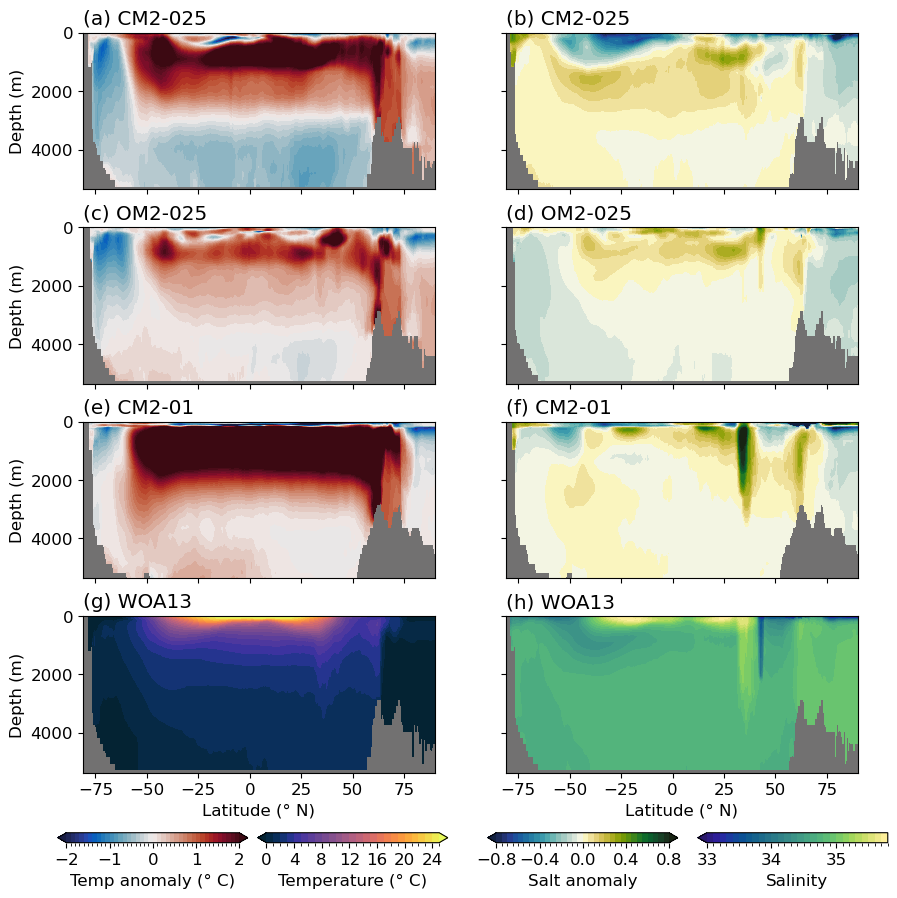

In [45]:
plt.figure(figsize=(10,10))
clev=np.arange(-2,2.05,0.1)
clev2=np.arange(-0.8,0.81,0.05)
    
plt.subplot(421)
gray_bg.plot(cmap=cm.cm.gray, add_colorbar=False)
p1=temp_CM2_025_anom.plot.contourf(cmap=cm.cm.balance, levels=clev, yincrease=False, add_colorbar=False)
#p1=temp_CM2_025_anom.plot(cmap=cm.cm.balance, vmin=-2, vmax=2, yincrease=False, add_colorbar=False)
plt.xlabel('')
plt.ylabel('Depth (m)')
plt.title('(a) CM2-025', loc='left')
plt.tick_params(labelbottom=False)

plt.subplot(422)
gray_bg.plot(cmap=cm.cm.gray, add_colorbar=False)
s1=salt_CM2_025_anom.plot.contourf(cmap=cm.cm.delta, levels=clev2, yincrease=False, add_colorbar=False)
plt.xlabel('')
plt.ylabel('')
plt.title('(b) CM2-025', loc='left')
plt.tick_params(labelbottom=False, labelleft=False)

plt.subplot(423)
gray_bg.plot(cmap=cm.cm.gray, add_colorbar=False)
p2=temp_OM2_025_anom.plot.contourf(cmap=cm.cm.balance, levels=clev, yincrease=False, add_colorbar=False)
plt.xlabel('')
plt.ylabel('Depth (m)')
plt.title('(c) OM2-025', loc='left')
plt.tick_params(labelbottom=False)

plt.subplot(424)
gray_bg.plot(cmap=cm.cm.gray, add_colorbar=False)
s2=salt_OM2_025_anom.plot.contourf(cmap=cm.cm.delta, levels=clev2, yincrease=False, add_colorbar=False)
plt.xlabel('')
plt.ylabel('')
plt.title('(d) OM2-025', loc='left')
plt.tick_params(labelbottom=False, labelleft=False)

plt.subplot(425)
gray_bg.plot(cmap=cm.cm.gray, add_colorbar=False)
p3=temp_CM2_1_anom.plot.contourf(cmap=cm.cm.balance, levels=clev, yincrease=False, add_colorbar=False)
plt.xlabel('')
plt.ylabel('Depth (m)')
plt.title('(e) CM2-01', loc='left')
plt.tick_params(labelbottom=False)

plt.subplot(426)
gray_bg.plot(cmap=cm.cm.gray, add_colorbar=False)
s3=salt_CM2_1_anom.plot.contourf(cmap=cm.cm.delta, levels=clev2, yincrease=False, add_colorbar=False)
plt.xlabel('')
plt.ylabel('')
plt.title('(f) CM2-01', loc='left')
plt.tick_params(labelbottom=False, labelleft=False)

plt.subplot(427)
gray_bg.plot(cmap=cm.cm.gray, add_colorbar=False)
p4=zonal_temp_WOA13_025.plot.contourf(cmap=cm.cm.thermal, levels=np.arange(0,26,1), yincrease=False, add_colorbar=False)
plt.xlabel('Latitude (° N)')
plt.ylabel('Depth (m)')
plt.title('(g) WOA13', loc='left')

plt.subplot(428)
gray_bg.plot(cmap=cm.cm.gray, add_colorbar=False)
s4=zonal_salt_WOA13_025.plot.contourf(cmap=cm.cm.haline, levels=np.arange(33,35.81,0.1), yincrease=False, add_colorbar=False)
plt.xlabel('Latitude (° N)')
plt.ylabel('')
plt.title('(h) WOA13', loc='left')
plt.tick_params(labelleft=False)

plt.subplots_adjust(bottom=0.14,hspace=0.24)

# Colorbars
ax1 = plt.axes([0.1,0.07,0.19,0.01])
cb1 = plt.colorbar(p1, cax=ax1, orientation='horizontal', ticks=[-2, -1, 0, 1, 2])
#ax1.xaxis.set_label_position("top")
cb1.set_label('Temp anomaly (° C)')

ax2 = plt.axes([0.3,0.07,0.19,0.01])
cb2 = plt.colorbar(p4, cax=ax2, orientation='horizontal', ticks=np.arange(0, 25, 4))
#ax1.xaxis.set_label_position("top")
cb2.set_label('Temperature (° C)')

ax3 = plt.axes([0.53,0.07,0.19,0.01])
cb3 = plt.colorbar(s1, cax=ax3, orientation='horizontal', ticks=[-0.8, -0.4, 0, 0.4, 0.8])
#ax1.xaxis.set_label_position("top")
cb3.set_label('Salt anomaly') #(g/kg)

ax4 = plt.axes([0.74,0.07,0.19,0.01])
cb4 = plt.colorbar(s4, cax=ax4, orientation='horizontal', ticks=[33, 34, 35])
#ax1.xaxis.set_label_position("top")
cb4.set_label('Salinity') #  (g/kg)

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig7_temp_salt_zonal_bias_cz861.png'
    plt.savefig(fig_path + fig_name, dpi=300, bbox_inches='tight', facecolor='white');

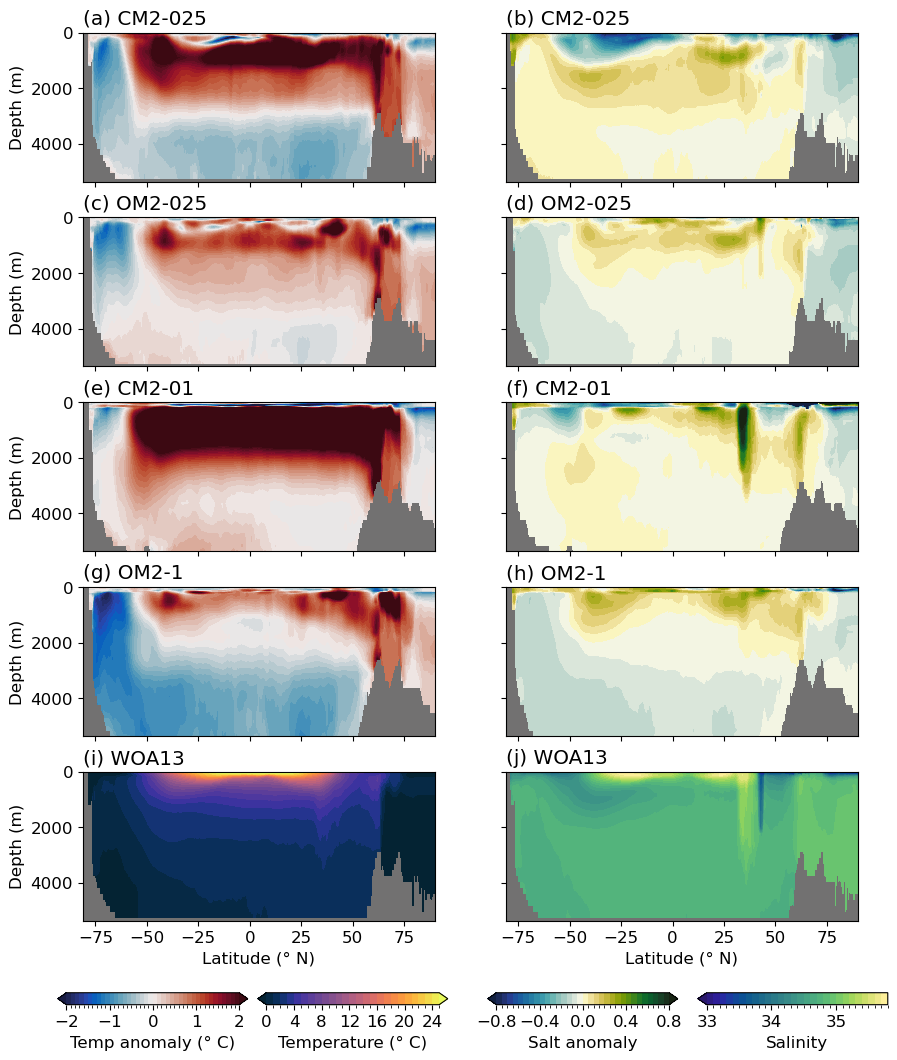

In [73]:
plt.figure(figsize=(10,12))
clev=np.arange(-2,2.05,0.1)
clev2=np.arange(-0.8,0.81,0.05)
    
plt.subplot(521)
gray_bg.plot(cmap=cm.cm.gray, add_colorbar=False)
p1=temp_CM2_025_anom.plot.contourf(cmap=cm.cm.balance, levels=clev, yincrease=False, add_colorbar=False)
#p1=temp_CM2_025_anom.plot(cmap=cm.cm.balance, vmin=-2, vmax=2, yincrease=False, add_colorbar=False)
plt.xlabel(''), plt.ylabel('Depth (m)')
plt.title('(a) CM2-025', loc='left')
plt.tick_params(labelbottom=False)

plt.subplot(522)
gray_bg.plot(cmap=cm.cm.gray, add_colorbar=False)
s1=salt_CM2_025_anom.plot.contourf(cmap=cm.cm.delta, levels=clev2, yincrease=False, add_colorbar=False)
plt.xlabel(''), plt.ylabel('')
plt.title('(b) CM2-025', loc='left')
plt.tick_params(labelbottom=False, labelleft=False)

plt.subplot(523)
gray_bg.plot(cmap=cm.cm.gray, add_colorbar=False)
p2=temp_OM2_025_anom.plot.contourf(cmap=cm.cm.balance, levels=clev, yincrease=False, add_colorbar=False)
plt.xlabel(''), plt.ylabel('Depth (m)')
plt.title('(c) OM2-025', loc='left')
plt.tick_params(labelbottom=False)

plt.subplot(524)
gray_bg.plot(cmap=cm.cm.gray, add_colorbar=False)
s2=salt_OM2_025_anom.plot.contourf(cmap=cm.cm.delta, levels=clev2, yincrease=False, add_colorbar=False)
plt.xlabel(''), plt.ylabel('')
plt.title('(d) OM2-025', loc='left')
plt.tick_params(labelbottom=False, labelleft=False)

plt.subplot(525)
gray_bg.plot(cmap=cm.cm.gray, add_colorbar=False)
p3=temp_CM2_1_anom.plot.contourf(cmap=cm.cm.balance, levels=clev, yincrease=False, add_colorbar=False)
plt.xlabel(''), plt.ylabel('Depth (m)')
plt.title('(e) CM2-01', loc='left')
plt.tick_params(labelbottom=False)

plt.subplot(526)
gray_bg.plot(cmap=cm.cm.gray, add_colorbar=False)
s3=salt_CM2_1_anom.plot.contourf(cmap=cm.cm.delta, levels=clev2, yincrease=False, add_colorbar=False)
plt.xlabel(''), plt.ylabel('')
plt.title('(f) CM2-01', loc='left')
plt.tick_params(labelbottom=False, labelleft=False)

plt.subplot(527)
gray_bg.plot(cmap=cm.cm.gray, add_colorbar=False)
p5=temp_OM2_1_anom.plot.contourf(cmap=cm.cm.balance, levels=clev, yincrease=False, add_colorbar=False)
plt.xlabel(''), plt.ylabel('Depth (m)')
plt.title('(g) OM2-1', loc='left')
plt.tick_params(labelbottom=False)

plt.subplot(528)
gray_bg.plot(cmap=cm.cm.gray, add_colorbar=False)
s5=salt_OM2_1_anom.plot.contourf(cmap=cm.cm.delta, levels=clev2, yincrease=False, add_colorbar=False)
plt.xlabel(''), plt.ylabel('')
plt.title('(h) OM2-1', loc='left')
plt.tick_params(labelbottom=False, labelleft=False)

plt.subplot(529)
gray_bg.plot(cmap=cm.cm.gray, add_colorbar=False)
p4=zonal_temp_WOA13_025.plot.contourf(cmap=cm.cm.thermal, levels=np.arange(0,26,1), yincrease=False, add_colorbar=False)
plt.xlabel('Latitude (° N)'), plt.ylabel('Depth (m)')
plt.title('(i) WOA13', loc='left')

plt.subplot(5,2,10)
gray_bg.plot(cmap=cm.cm.gray, add_colorbar=False)
s4=zonal_salt_WOA13_025.plot.contourf(cmap=cm.cm.haline, levels=np.arange(33,35.81,0.1), yincrease=False, add_colorbar=False)
plt.xlabel('Latitude (° N)'), plt.ylabel('')
plt.title('(j) WOA13', loc='left')
plt.tick_params(labelleft=False)

plt.subplots_adjust(bottom=0.14,hspace=0.24)

# Colorbars
ax1 = plt.axes([0.1,0.07,0.19,0.01])
cb1 = plt.colorbar(p1, cax=ax1, orientation='horizontal', ticks=[-2, -1, 0, 1, 2])
#ax1.xaxis.set_label_position("top")
cb1.set_label('Temp anomaly (° C)')

ax2 = plt.axes([0.3,0.07,0.19,0.01])
cb2 = plt.colorbar(p4, cax=ax2, orientation='horizontal', ticks=np.arange(0, 25, 4))
#ax1.xaxis.set_label_position("top")
cb2.set_label('Temperature (° C)')

ax3 = plt.axes([0.53,0.07,0.19,0.01])
cb3 = plt.colorbar(s1, cax=ax3, orientation='horizontal', ticks=[-0.8, -0.4, 0, 0.4, 0.8])
#ax1.xaxis.set_label_position("top")
cb3.set_label('Salt anomaly') #(g/kg)

ax4 = plt.axes([0.74,0.07,0.19,0.01])
cb4 = plt.colorbar(s4, cax=ax4, orientation='horizontal', ticks=[33, 34, 35])
#ax1.xaxis.set_label_position("top")
cb4.set_label('Salinity') #  (g/kg)

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig7_temp_salt_zonal_bias_4_cz861.png'
    plt.savefig(fig_path + fig_name, dpi=300, bbox_inches='tight', facecolor='white');